In [ ]:
#hide
#default_exp cli
from nbdev.showdoc import show_doc
from nbdev import *

# CLI

> The command line interface for the HECSS sampler

*Not implemented yet*

In [ ]:
#hide
#export
from fastcore.script import *
from pathlib import Path
import os
import ase
from ase.calculators.vasp import Vasp
from ase import units as un
from hecss.core import *

In [ ]:
from hecss.monitor import plot_stats

In [ ]:
#export
def dfset_writer(s, sl, workdir=''):
    '''
    Just write samples to the DFSET.dat file in the workdir directory.
    '''
    wd = Path(workdir)
    write_dfset(f'{wd.joinpath("DFSET.dat")}', s)
    # Important! Return False to keep iteration going
    return False

In [ ]:
#export
@call_parse
def hecss_sampler(fname:Param("Basic structure file. Any type recognized by ASE is accepted.", str)="CONTCAR",
                  work_dir:Param("Work directory", str)="WORK",
                  label:Param("Label for the calculations. This got appended to work directory")="hecss",
                  T:Param("Target temperature in Kelvin", float)=300,
                  calc:Param("ASE calculator to be used for the job.\n"+
                             "Supported calculators: VASP (default)"
                             , str)="VASP",
                  N:Param("Number of samples to be generated", int)=10,
                  DF:Param("Write DFSET file for ALAMODE", bool)=False,
                  com:Param("Command to run calculator", str)="./run-calc",
                  ):
    '''
    Run HECSS sampler on the structure in the directory.
    '''
    print(f'Running HECSS on {fname} at {T}K in {work_dir} directory using {calc}.')
    
    src_path = Path(fname)
    
    print(src_path.parent, src_path.name)
    
    if calc=="VASP":
        calculator = Vasp(label=label, directory=src_path.parent, restart=True)
        cryst = ase.Atoms(calculator.atoms)
        cryst.set_calculator(calculator)
        calculator.set(directory=work_dir)
        com = Path(com)
        calculator.set(command=f'{com.absolute()} {label}')
    sentinel = None
    if DF :
        sentinel = dfset_writer
    sampler = HECSS(cryst, calculator, T, directory=work_dir)
    samples = sampler.generate(N, sentinel=sentinel, workdir=work_dir)
    return samples

In [ ]:
#vasp
samples = hecss_sampler("example/VASP_3C-SiC/1x1x1/sc_1x1x1/CONTCAR", 
                        work_dir='TMP', T=300, N=300, com='./run-vasp')

Running HECSS on example/VASP_3C-SiC/1x1x1/sc_1x1x1/CONTCAR at 300K in TMP directory using VASP.
example/VASP_3C-SiC/1x1x1/sc_1x1x1 CONTCAR


0it [00:00, ?it/s]

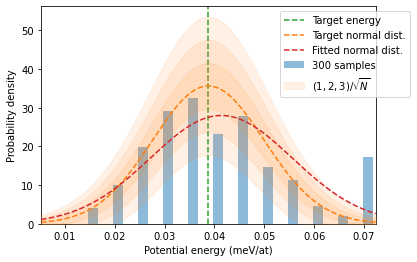

In [ ]:
#vasp
plot_stats(samples, 300)